In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df = pd.read_csv('Beer_data_fin.csv')
df['date'] = pd.to_datetime(df['date'])

In [3]:
# let's see columns available

df.columns

Index(['username', 'beer', 'brewery', 'rating', 'bar', 'checkin_text',
       'serving', 'date', 'beer_link', 'brewery_link', 'bar_link',
       'bar_adress', 'latitude', 'longitude'],
      dtype='object')

In [4]:
temp = df['latitude'].unique()
[temp.min(), temp.max()]

[-38.5426744, 68.9174061]

In [5]:
# looks like dataset contains not only saint-petersburg...
# let's filter data and leave only saint-petersburg
# google maps service says the city spans from 59.632 to 60.247 latitude and 29.633 to 30.763 longitude (all approximate)

is_spb = (59.632 <= df['latitude']) & (df['latitude'] <= 60.247) & (29.633 <= df['longitude']) & (df['longitude'] <= 30.763)
print([len(df[is_spb]), len(df), len(df) - len(df[is_spb])])
df = df[is_spb]

[68858, 75246, 6388]


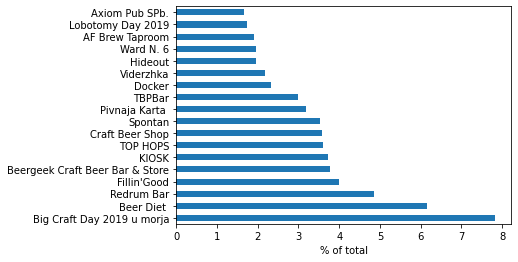

In [6]:
# we filtered out 6388 records, not so much actually (~8.5%)
# let's see top 18 popular bars

axes = (df['bar'].value_counts().head(18) / df.shape[0] * 100).plot.barh()
axes.set_xlabel("% of total");

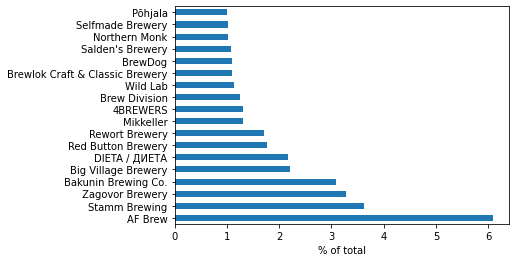

In [7]:
# let's see top 18 popular breweries
# NB: Põhjala is as estonian brewery :)

axes = (df['brewery'].value_counts().head(18) / df.shape[0] * 100).plot.barh()
axes.set_xlabel("% of total");

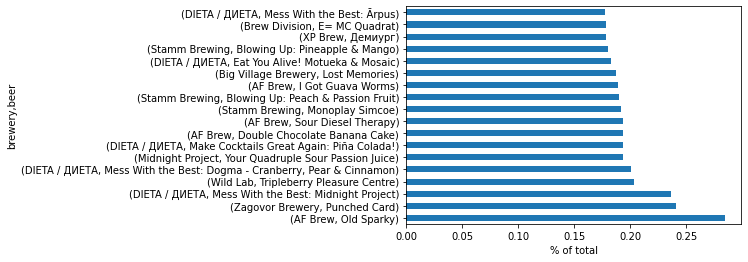

In [8]:
# let's see top 18 popular beers 

temp = df[['brewery', 'beer', 'rating']] \
    .groupby(['brewery', 'beer']) \
    .agg(share=('beer', 'count'), mean_rating=('rating', 'mean')) \
    .sort_values('share', ascending=False) \
    .head(18)
temp['share'] = temp['share'] / df.shape[0] * 100

axes = temp.plot.barh(y='share', legend=False)
axes.set_xlabel('% of total');

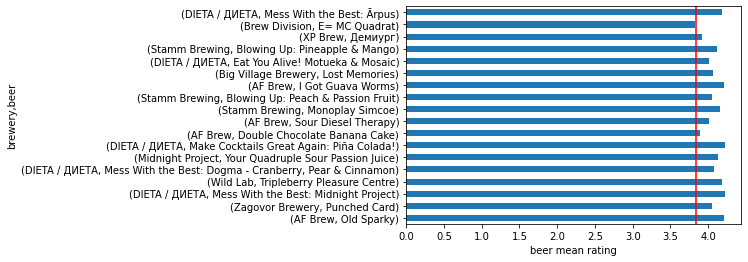

In [9]:
# we see that share of most popular beers is really small
# now let's plot their ratings
# red line represents total mean rating

axes = temp.plot.barh(y='mean_rating', legend=False)
axes.set_xlabel('beer mean rating')
total_mean = df['rating'].mean()
axes.axvline(total_mean, color='red');


In [10]:
# we can thus conclude that most popular beers are also high-rated with one exceptions
# looking at top rated beers has no sense without using some sophisticated rating formula,
# since 1 apperance with 5.0 rating would yield mean rating of 5.0

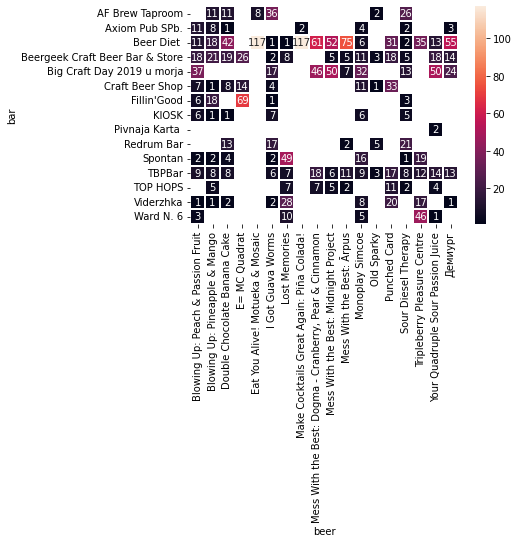

In [11]:
# let's look at intersection of top bars and top beers

top_bars = df['bar'].value_counts().head(18).index
top_beers = df['beer'].value_counts().head(18).index
temp = df[df['bar'].isin(top_bars) & df['beer'].isin(top_beers)][['bar', 'beer']]
temp = temp.pivot_table(index='bar', columns='beer', aggfunc=len, fill_value=0)
sns.heatmap(temp, annot=True, fmt="d", linewidths=.2, mask=(temp == 0));

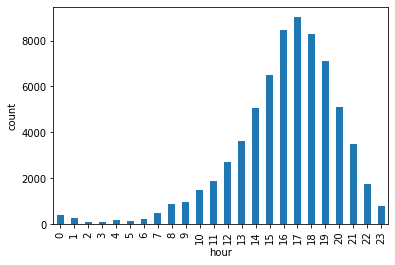

In [12]:
# time of checkins
axes = df['date'].dt.hour.value_counts().sort_index().plot.bar()
axes.set_xlabel('hour')
axes.set_ylabel('count');

In [13]:
df.groupby(['bar', 'beer'])['beer'].value_counts().nlargest(5)

bar            beer                                      beer                                    
Beer Diet      Eat You Alive! Motueka & Mosaic           Eat You Alive! Motueka & Mosaic             117
               Make Cocktails Great Again: Piña Colada!  Make Cocktails Great Again: Piña Colada!    117
Beer Addicts   Old Sparky                                Old Sparky                                  109
Beertravelbar  Samichlaus Classic                        Samichlaus Classic                          106
Fillin'Good    BrewDog VS Cloudwater: New England IPA    BrewDog VS Cloudwater: New England IPA       94
Name: beer, dtype: int64

In [14]:
temp = df.groupby(['bar', 'beer']).agg(count=('beer', 'count'))
temp['count'].groupby('bar', group_keys=False).nlargest(1).sort_values(ascending=False)

bar                         beer                                               
Beer Diet                   Eat You Alive! Motueka & Mosaic                        117
Beer Addicts                Old Sparky                                             109
Beertravelbar               Samichlaus Classic                                     106
Fillin'Good                 BrewDog VS Cloudwater: New England IPA                  94
Big Craft Day 2019 u morja  Offering To Kitthanos - Reality Stone                   75
                                                                                  ... 
MF Bagel Bar                Первый авиатор (The 1st Aviator)                         1
METRO Cash & Carry          Chimay Blue / Bleue / Blauw (Grande Réserve) (2018)      1
MEGA Mall                   Ochakovskiy Kvass (Очаковский Квас)                      1
London Pub                  Weihenstephaner Korbinian                                1
中国风 Veter Kitaja            Affligem Blonde       